In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Preliminary Data Analysis

## Loading the datasets.

In [183]:
# 2021 Dataset

df_21 = pd.read_csv('dataset/PHL-PSA-FIES-2021-PUF/FIES PUF 2021 Vol.1.csv')

# 2023 Dataset

df_23 = pd.read_csv('dataset/PHL-PSA-FIES-2023-V1-PUF/FIES PUF 2023 Volume1.csv')

C:\Users\Chy\AppData\Local\Temp\ipykernel_12444\1626076420.py:7: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df_23 = pd.read_csv('dataset/PHL-PSA-FIES-2023-V1-PUF/FIES PUF 2023 Volume1.csv')


## Data Cleaning

In [184]:
df_21.columns

Index(['W_REGN', 'W_PROV', 'SEQUENCE_NO', 'FSIZE', 'REG_SAL', 'SEASON_SAL',
       'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC',
       'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT',
       'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET',
       'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10',
       'EAINC', 'TOINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL',
       'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA',
       'COCOA', 'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL',
       'TOBACCO', 'OTHER_VEG', 'SERVICES_PRIMARY_GOODS',
       'ALCOHOL_PROCDUCTION_SERVICES', 'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD',
       'CLOTH', 'FURNISHING', 'HEALTH', 'HOUSING_WATER', 'ACTRENT', 'RENTVAL',
       'IMPUTED_RENT', 'BIMPUTED_RENT', 'TRANSPORT', 'COMMUNICATION',
       'RECREATION', 'EDUCATION', 'INSURANCE', 'MISCELLANEOUS', 'DURABLE',
       'OCCASION', 'OTHER_EXPENDITURE', 'OTHER_DISBU

In [185]:
df_23.columns

Index(['W_REGN', 'W_PROV', 'SEQ_NO', 'RPROV', 'FSIZE', 'REG_SAL', 'SEASON_SAL',
       'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC',
       'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT',
       'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET',
       'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10',
       'EAINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT',
       'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA',
       'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO',
       'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES',
       'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD', 'CLOTH', 'HOUSING_WATER',
       'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT', 'RENTVAL', 'FURNISHING',
       'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION',
       'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION',
       'OTHER_EXPENDITURE', 'OTHER_DISBURSEME

In [186]:
# Since there are discrepancies between the 2021 and 2023 dataset. We will follow the better described columns between the two datasets.
# For example, the SEQUENCE_NO in the 2021 dataset is described as "Sequence No." while in the 2023 dataset it is described as "Household ID"

df_21.rename(columns={'SEQUENCE_NO': 'SEQ_NO'}, inplace=True)

In [187]:
# Since `BWEIGHT` does not exist in the 2023 dataset, we will drop it from the 2021 dataset to retain consistency.

df_21.drop(columns=['BWEIGHT'], inplace=True)

In [188]:
df_21.rename(columns={'RFACT': 'FAMILY_WEIGHT'}, inplace=True)
df_23.rename(columns={'RFACT': 'FAMILY_WEIGHT'}, inplace=True)

In [189]:
df_21.rename(columns={'RFACT_POP': 'POPULATION_WEIGHT'}, inplace=True)
df_23.rename(columns={'MEM_RFACT': 'POPULATION_WEIGHT'}, inplace=True)

In [190]:
df_23.rename(columns={'PERCAPITA': 'PCINC'}, inplace=True)
df_23.drop(columns=['PPCINC'], inplace=True)
df_23.rename(columns={'PRPCINC': 'PPCINC'}, inplace=True)

In [191]:
df_23.drop(columns=['RPCINC_NIR'], inplace=True)

In [192]:
df_23.drop(columns=['W_REGN_NIR'], inplace=True)

In [193]:
df_21.rename(columns={'FSIZE': 'AVG_FSIZE'}, inplace=True)
df_23.rename(columns={'FSIZE': 'AVG_FSIZE'}, inplace=True)

In [194]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165029 entries, 0 to 165028
Data columns (total 87 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   W_REGN                        165029 non-null  int64  
 1   W_PROV                        165029 non-null  int64  
 2   SEQ_NO                        165029 non-null  int64  
 3   AVG_FSIZE                     165029 non-null  float64
 4   REG_SAL                       165029 non-null  int64  
 5   SEASON_SAL                    165029 non-null  int64  
 6   WAGES                         165029 non-null  int64  
 7   NETSHARE                      165029 non-null  int64  
 8   CASH_ABROAD                   165029 non-null  int64  
 9   CASH_DOMESTIC                 165029 non-null  int64  
 10  RENTALS_REC                   165029 non-null  int64  
 11  INTEREST                      165029 non-null  int64  
 12  PENSION                       165029 non-nul

In [195]:
df_21.sample(10)

,W_REGN,W_PROV,SEQ_NO,AVG_FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,...,TOREC,URB,RPROV,RPSU,FAMILY_WEIGHT,POPULATION_WEIGHT,PCINC,NPCINC,RPCINC,PPCINC
26626,4,10,26627,4.00,0,9000,9000,0,0,8500,...,370133,2,1000,1290,460.00,440.99,90258.25,8.00,7.00,7.00
9491,2,31,9492,2.00,60000,0,60000,0,13200,5000,...,136248,2,3100,1297,272.43,271.56,66756.00,6.00,7.00,7.00
131237,14,1,131238,4.50,71200,38000,109200,0,5000,0,...,165826,2,100,84,32.28,33.42,36850.22,3.00,2.00,3.00
1770,1,29,1771,6.00,0,135500,135500,0,0,50000,...,479264,2,2900,360,112.89,123.10,77710.66,7.00,7.00,7.00
24842,3,77,24843,6.50,1043977,0,1043977,0,0,33000,...,1516426,1,7700,165,36.49,37.16,227495.69,10.00,10.00,10.00
123294,13,76,123295,5.50,0,0,0,0,40000,90000,...,276740,1,7601,442,71.41,70.06,48498.18,4.00,2.00,2.00
162193,17,53,162194,2.00,0,74600,74600,0,0,0,...,133100,1,5316,60,43.50,41.00,66550.00,6.00,7.00,6.00
155980,16,85,155981,5.00,300000,0,300000,0,0,0,...,443080,2,8500,66,35.93,35.31,88616.00,8.00,9.00,9.00
53455,6,45,53456,4.00,0,68400,68400,0,0,0,...,97200,2,4500,1733,423.75,409.99,24300.00,1.00,2.00,2.00
88694,10,43,88695,6.00,210280,43200,253480,0,0,0,...,271480,1,4305,374,130.04,123.99,45246.67,4.00,5.00,3.00


In [196]:
# To avoid scientific notation formatting
pd.set_option('display.float_format', '{:.2f}'.format)

df_21.describe()

,W_REGN,W_PROV,SEQ_NO,AVG_FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,...,TOREC,URB,RPROV,RPSU,FAMILY_WEIGHT,POPULATION_WEIGHT,PCINC,NPCINC,RPCINC,PPCINC
count,165029.00,165029.00,165029.00,165029.00,165029.00,165029.00,165029.00,165029.00,165029.00,165029.00,...,165029.00,165029.00,165029.00,165029.00,165029.00,165029.00,165029.00,165029.00,165029.00,165029.00
mean,9.27,45.66,82515.00,4.24,125300.56,25109.55,150410.11,1808.75,20017.54,16718.44,...,308397.95,1.52,4568.17,386.17,159.96,157.99,81850.92,5.29,5.53,5.49
std,4.70,24.89,47639.91,2.03,205360.38,47930.15,207443.14,14886.86,77520.00,31501.17,...,369101.24,0.50,2488.66,448.86,153.63,149.12,101006.56,2.90,2.88,2.87
min,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10374.00,1.00,100.00,1.00,4.86,5.30,5408.62,1.00,1.00,1.00
25%,5.00,24.00,41258.00,3.00,0.00,0.00,21600.00,0.00,0.00,0.00,...,142900.00,1.00,2402.00,102.00,65.90,65.40,35403.00,3.00,3.00,3.00
50%,10.00,45.00,82515.00,4.00,56000.00,0.00,93000.00,0.00,0.00,8000.00,...,216980.00,2.00,4501.00,239.00,110.72,109.51,55432.00,5.00,6.00,5.00
75%,13.00,70.00,123772.00,5.50,165400.00,36000.00,191900.00,0.00,2000.00,21600.00,...,353216.00,2.00,7000.00,478.00,186.29,186.52,94000.00,8.00,8.00,8.00
max,17.00,98.00,165029.00,23.00,6821000.00,4290000.00,6821000.00,3901650.00,5130000.00,3000000.00,...,20736058.00,2.00,9804.00,3086.00,3950.61,4029.51,9691285.00,10.00,10.00,10.00


In [197]:
df_21.columns

Index(['W_REGN', 'W_PROV', 'SEQ_NO', 'AVG_FSIZE', 'REG_SAL', 'SEASON_SAL',
       'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC',
       'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT',
       'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET',
       'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10',
       'EAINC', 'TOINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL',
       'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA',
       'COCOA', 'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL',
       'TOBACCO', 'OTHER_VEG', 'SERVICES_PRIMARY_GOODS',
       'ALCOHOL_PROCDUCTION_SERVICES', 'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD',
       'CLOTH', 'FURNISHING', 'HEALTH', 'HOUSING_WATER', 'ACTRENT', 'RENTVAL',
       'IMPUTED_RENT', 'BIMPUTED_RENT', 'TRANSPORT', 'COMMUNICATION',
       'RECREATION', 'EDUCATION', 'INSURANCE', 'MISCELLANEOUS', 'DURABLE',
       'OCCASION', 'OTHER_EXPENDITURE', 'OTHER_DISBUR

In [198]:
df_23.columns

Index(['W_REGN', 'W_PROV', 'SEQ_NO', 'RPROV', 'AVG_FSIZE', 'REG_SAL',
       'SEASON_SAL', 'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC',
       'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE',
       'NET_RECEIPT', 'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR',
       'NET_RET', 'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9',
       'NET_NEC_A10', 'EAINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK',
       'OIL', 'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE',
       'TEA', 'COCOA', 'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL',
       'TOBACCO', 'OTHER_VEG', 'SERVICES_PRIMARY_GOODS',
       'ALCOHOL_PROCDUCTION_SERVICES', 'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD',
       'CLOTH', 'HOUSING_WATER', 'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT',
       'RENTVAL', 'FURNISHING', 'HEALTH', 'TRANSPORT', 'COMMUNICATION',
       'RECREATION', 'EDUCATION', 'INSURANCE', 'MISCELLANEOUS', 'DURABLE',
       'OCCASION', 'OTHER_EXPENDITURE', 'OTHER_DISBUR

In [199]:
df_23.shape[1]

87

In [200]:
df_21.shape[1]

87

In [201]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165029 entries, 0 to 165028
Data columns (total 87 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   W_REGN                        165029 non-null  int64  
 1   W_PROV                        165029 non-null  int64  
 2   SEQ_NO                        165029 non-null  int64  
 3   AVG_FSIZE                     165029 non-null  float64
 4   REG_SAL                       165029 non-null  int64  
 5   SEASON_SAL                    165029 non-null  int64  
 6   WAGES                         165029 non-null  int64  
 7   NETSHARE                      165029 non-null  int64  
 8   CASH_ABROAD                   165029 non-null  int64  
 9   CASH_DOMESTIC                 165029 non-null  int64  
 10  RENTALS_REC                   165029 non-null  int64  
 11  INTEREST                      165029 non-null  int64  
 12  PENSION                       165029 non-nul

### Checking for missing values

In [202]:
# Result should be 17 since there are 17 regions in the Philippines
print(df_21["W_REGN"].nunique())
print(df_23["W_REGN"].nunique())

17
17


In [203]:
# Result should be 82 since there are 82 provinces in the Philippines. 38 in Luzon, 27 in the Visayas and 17 in Mindanao.
print(df_21["W_PROV"].nunique())
print(df_23["W_PROV"].nunique())

87
87


In [204]:
# Override pandas display function
pd.options.display.min_rows = 87
df_21.isnull().sum()

W_REGN                0
W_PROV                0
SEQ_NO                0
AVG_FSIZE             0
REG_SAL               0
SEASON_SAL            0
WAGES                 0
NETSHARE              0
CASH_ABROAD           0
CASH_DOMESTIC         0
RENTALS_REC           0
INTEREST              0
PENSION               0
DIVIDENDS             0
OTHER_SOURCE          0
NET_RECEIPT           0
REGFT                 0
NET_CFG               0
NET_LPR               0
NET_FISH              0
NET_FOR               0
NET_RET               0
NET_MFG               0
NET_TRANS             0
NET_NEC_A8            0
NET_NEC_A9            0
NET_NEC_A10           0
EAINC                 0
TOINC                 0
LOSSES                0
                     ..
HOUSING_WATER         0
ACTRENT               0
RENTVAL               0
IMPUTED_RENT          0
BIMPUTED_RENT         0
TRANSPORT             0
COMMUNICATION         0
RECREATION            0
EDUCATION             0
INSURANCE             0
MISCELLANEOUS   

In [205]:
df_23.isnull().sum()

W_REGN                0
W_PROV                0
SEQ_NO                0
RPROV                 0
AVG_FSIZE             0
REG_SAL               0
SEASON_SAL            0
WAGES                 0
NETSHARE              0
CASH_ABROAD           0
CASH_DOMESTIC         0
RENTALS_REC           0
INTEREST              0
PENSION               0
DIVIDENDS             0
OTHER_SOURCE          0
NET_RECEIPT           0
REGFT                 0
NET_CFG               0
NET_LPR               0
NET_FISH              0
NET_FOR               0
NET_RET               0
NET_MFG               0
NET_TRANS             0
NET_NEC_A8            0
NET_NEC_A9            0
NET_NEC_A10           0
EAINC                 0
LOSSES                0
                     ..
IMPUTED_RENT          0
BIMPUTED_RENT         0
RENTVAL               0
FURNISHING            0
HEALTH                0
TRANSPORT             0
COMMUNICATION         0
RECREATION            0
EDUCATION             0
INSURANCE             0
MISCELLANEOUS   

### Inspecting duplicates

In [206]:
print(df_21.duplicated().sum())
print(df_23.duplicated().sum())

0
0


### Inspecting data types

In [207]:
df_21.dtypes

W_REGN                  int64
W_PROV                  int64
SEQ_NO                  int64
AVG_FSIZE             float64
REG_SAL                 int64
SEASON_SAL              int64
WAGES                   int64
NETSHARE                int64
CASH_ABROAD             int64
CASH_DOMESTIC           int64
RENTALS_REC             int64
INTEREST                int64
PENSION                 int64
DIVIDENDS               int64
OTHER_SOURCE            int64
NET_RECEIPT             int64
REGFT                   int64
NET_CFG                 int64
NET_LPR                 int64
NET_FISH                int64
NET_FOR                 int64
NET_RET                 int64
NET_MFG                 int64
NET_TRANS               int64
NET_NEC_A8              int64
NET_NEC_A9              int64
NET_NEC_A10             int64
EAINC                   int64
TOINC                   int64
LOSSES                  int64
                       ...   
HOUSING_WATER           int64
ACTRENT                 int64
RENTVAL   

### Inspecting for Whitespaces

In [208]:
df_23['TOTDIS'] = pd.to_numeric(df_23['TOTDIS'].str.strip().replace(r'^\s*$','0', regex=True), errors='coerce').fillna(0)

### Inspecting for Outliers

In [209]:
#TODO

### Inspecting Multicollinearity

In [210]:
# TODO

### Inspecting Outliers

#### Investigating for Skewed Distributions

In [211]:
# Investigate further since the dataset contains numeric values, it is naturally skewed.
df_21.skew().sort_values(ascending=False)

NET_RECEIPT                    238.08
LOSSES                         214.07
SERVICES_PRIMARY_GOODS         185.41
RENTALS_REC                    169.69
NET_NEC_A9                     165.35
OTHER_NON_ALCOHOL              156.03
NET_FOR                        155.06
NET_LPR                        152.62
BIMPUTED_RENT                  137.49
OTHER_SOURCE                   135.68
NET_NEC_A10                    129.10
NETSHARE                       117.99
DIVIDENDS                      111.56
RECREATION                      97.79
FOOD_ACCOM_SRVC                 81.42
ALCOHOL_PROCDUCTION_SERVICES    81.22
NET_TRANS                       78.39
OTHREC                          73.90
NET_NEC_A8                      68.22
INTEREST                        68.07
PENSION                         58.10
HEALTH                          50.21
OTHER_DISBURSEMENT              45.66
NET_RET                         45.23
MISCELLANEOUS                   43.89
NET_CFG                         34.46
OTHER_EXPEND

#### Investigating High-Variance Columns

In [238]:
# Decide on what should be checked for its outliers and remove it
df_21.std().sort_values(ascending=False)[:10]

TOREC                369101.24
TOINC                331856.56
TOTDIS               277815.17
WAGES                207443.14
REG_SAL              205360.38
TOTEX                189577.56
EAINC                176713.46
NFOOD                151094.32
OTHER_DISBURSEMENT   147104.08
NET_RET              130247.33
dtype: float64

In [239]:
df_23.std().sort_values(ascending=False)[:10]

TOREC                440624.86
TOINC                406065.14
EAINC                266040.51
WAGES                249486.30
REG_SAL              238460.01
NET_RET              225106.39
TOTEX                195625.70
OTHER_DISBURSEMENT   175215.73
PCINC                158543.18
NFOOD                158238.92
dtype: float64

#### Sample of Plotting Outliers

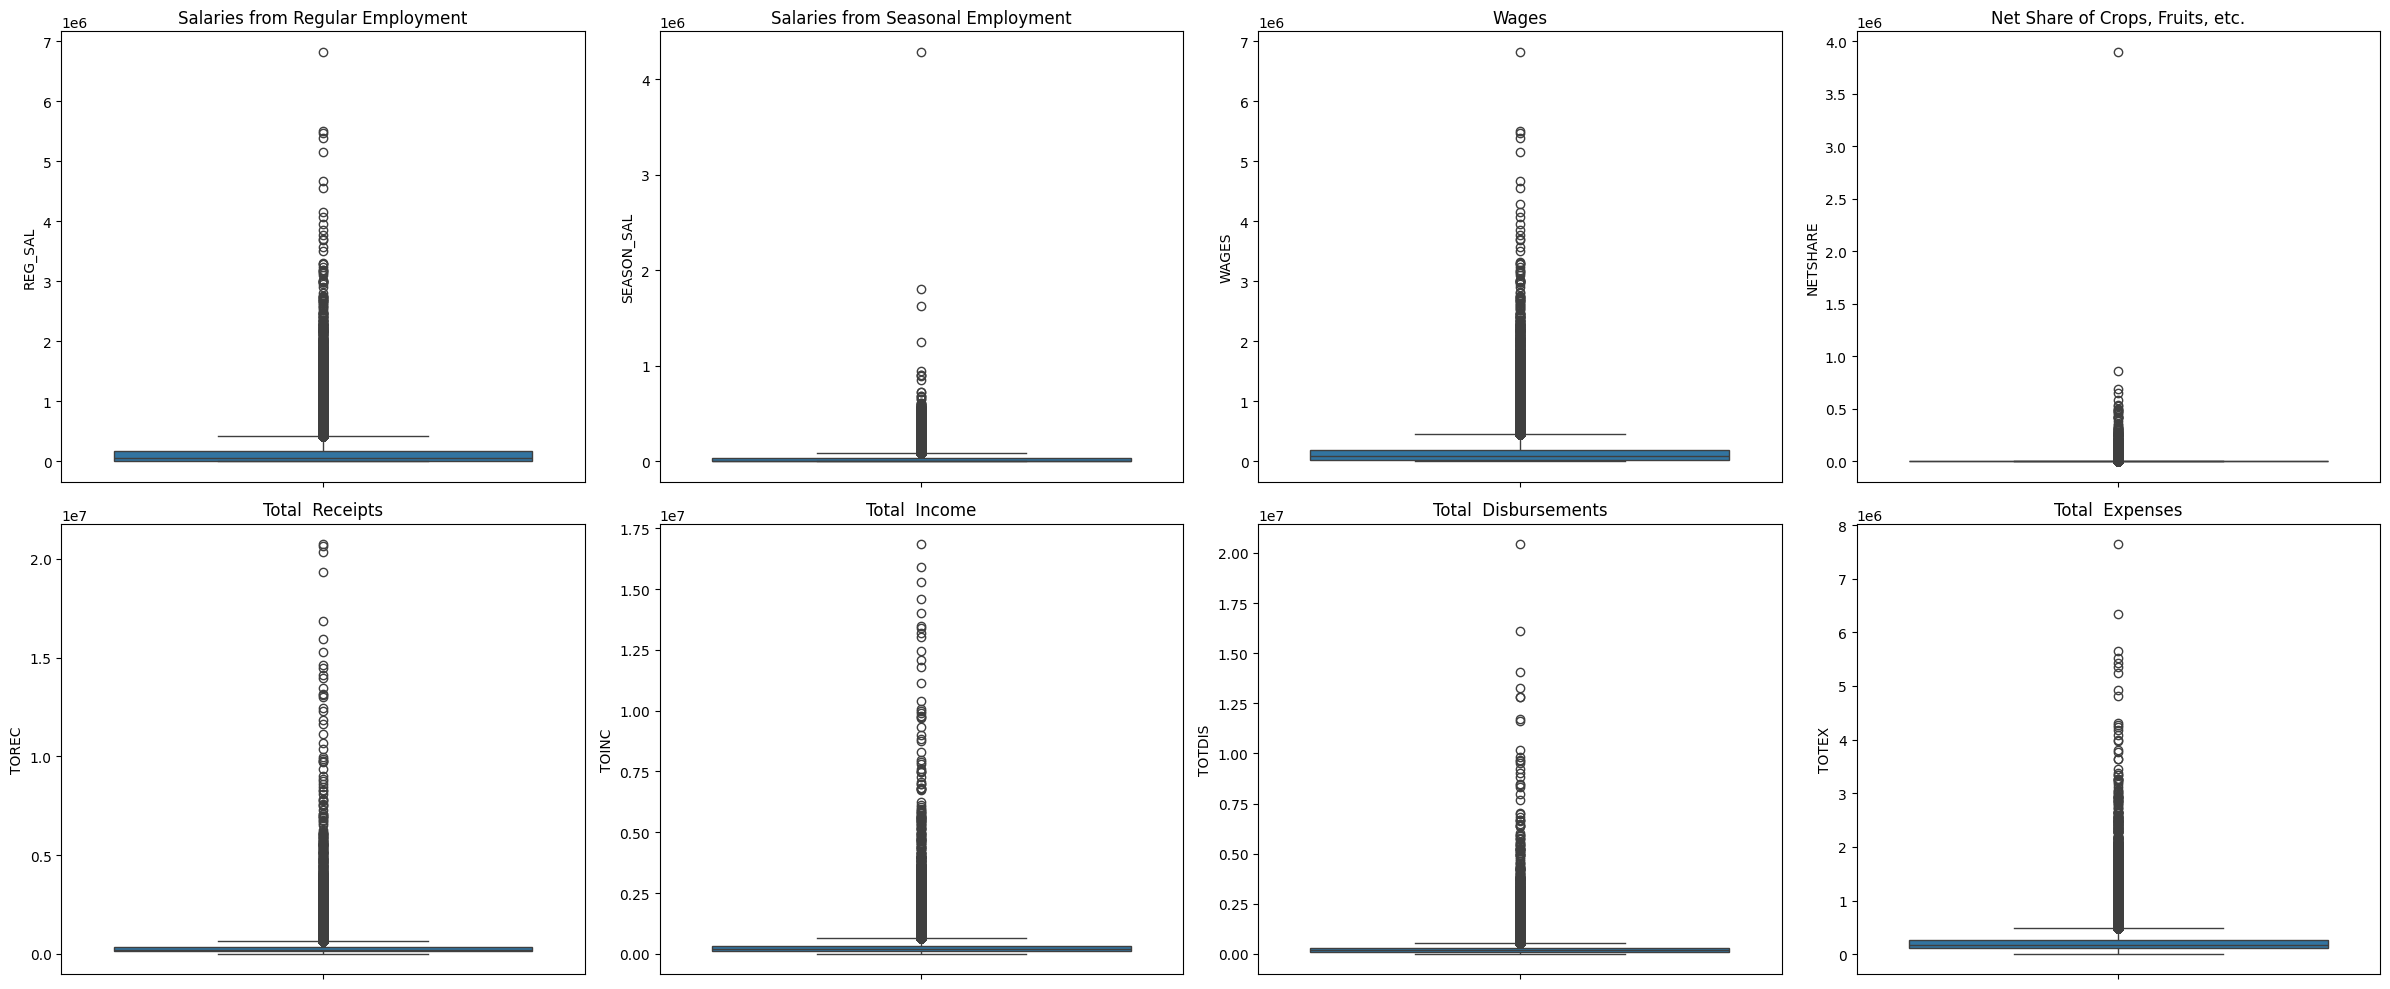

In [213]:
fig, axes = plt.subplots(2,4, figsize=(24,10))

sns.boxplot(df_21["REG_SAL"], ax=axes[0,0])
axes[0,0].set_title('Salaries from Regular Employment')

sns.boxplot(df_21["SEASON_SAL"], ax=axes[0,1])
axes[0,1].set_title('Salaries from Seasonal Employment')

sns.boxplot(df_21["WAGES"], ax=axes[0,2])
axes[0,2].set_title('Wages')

sns.boxplot(df_21["NETSHARE"], ax=axes[0,3])
axes[0,3].set_title('Net Share of Crops, Fruits, etc.')

sns.boxplot(df_21["TOREC"], ax=axes[1,0])
axes[1,0].set_title('Total  Receipts')

sns.boxplot(df_21["TOINC"], ax=axes[1,1])
axes[1,1].set_title('Total  Income')

sns.boxplot(df_21["TOTDIS"], ax=axes[1,2])
axes[1,2].set_title('Total  Disbursements')

sns.boxplot(df_21["TOTEX"], ax=axes[1,3])
axes[1,3].set_title('Total  Expenses')

plt.tight_layout()
plt.show()

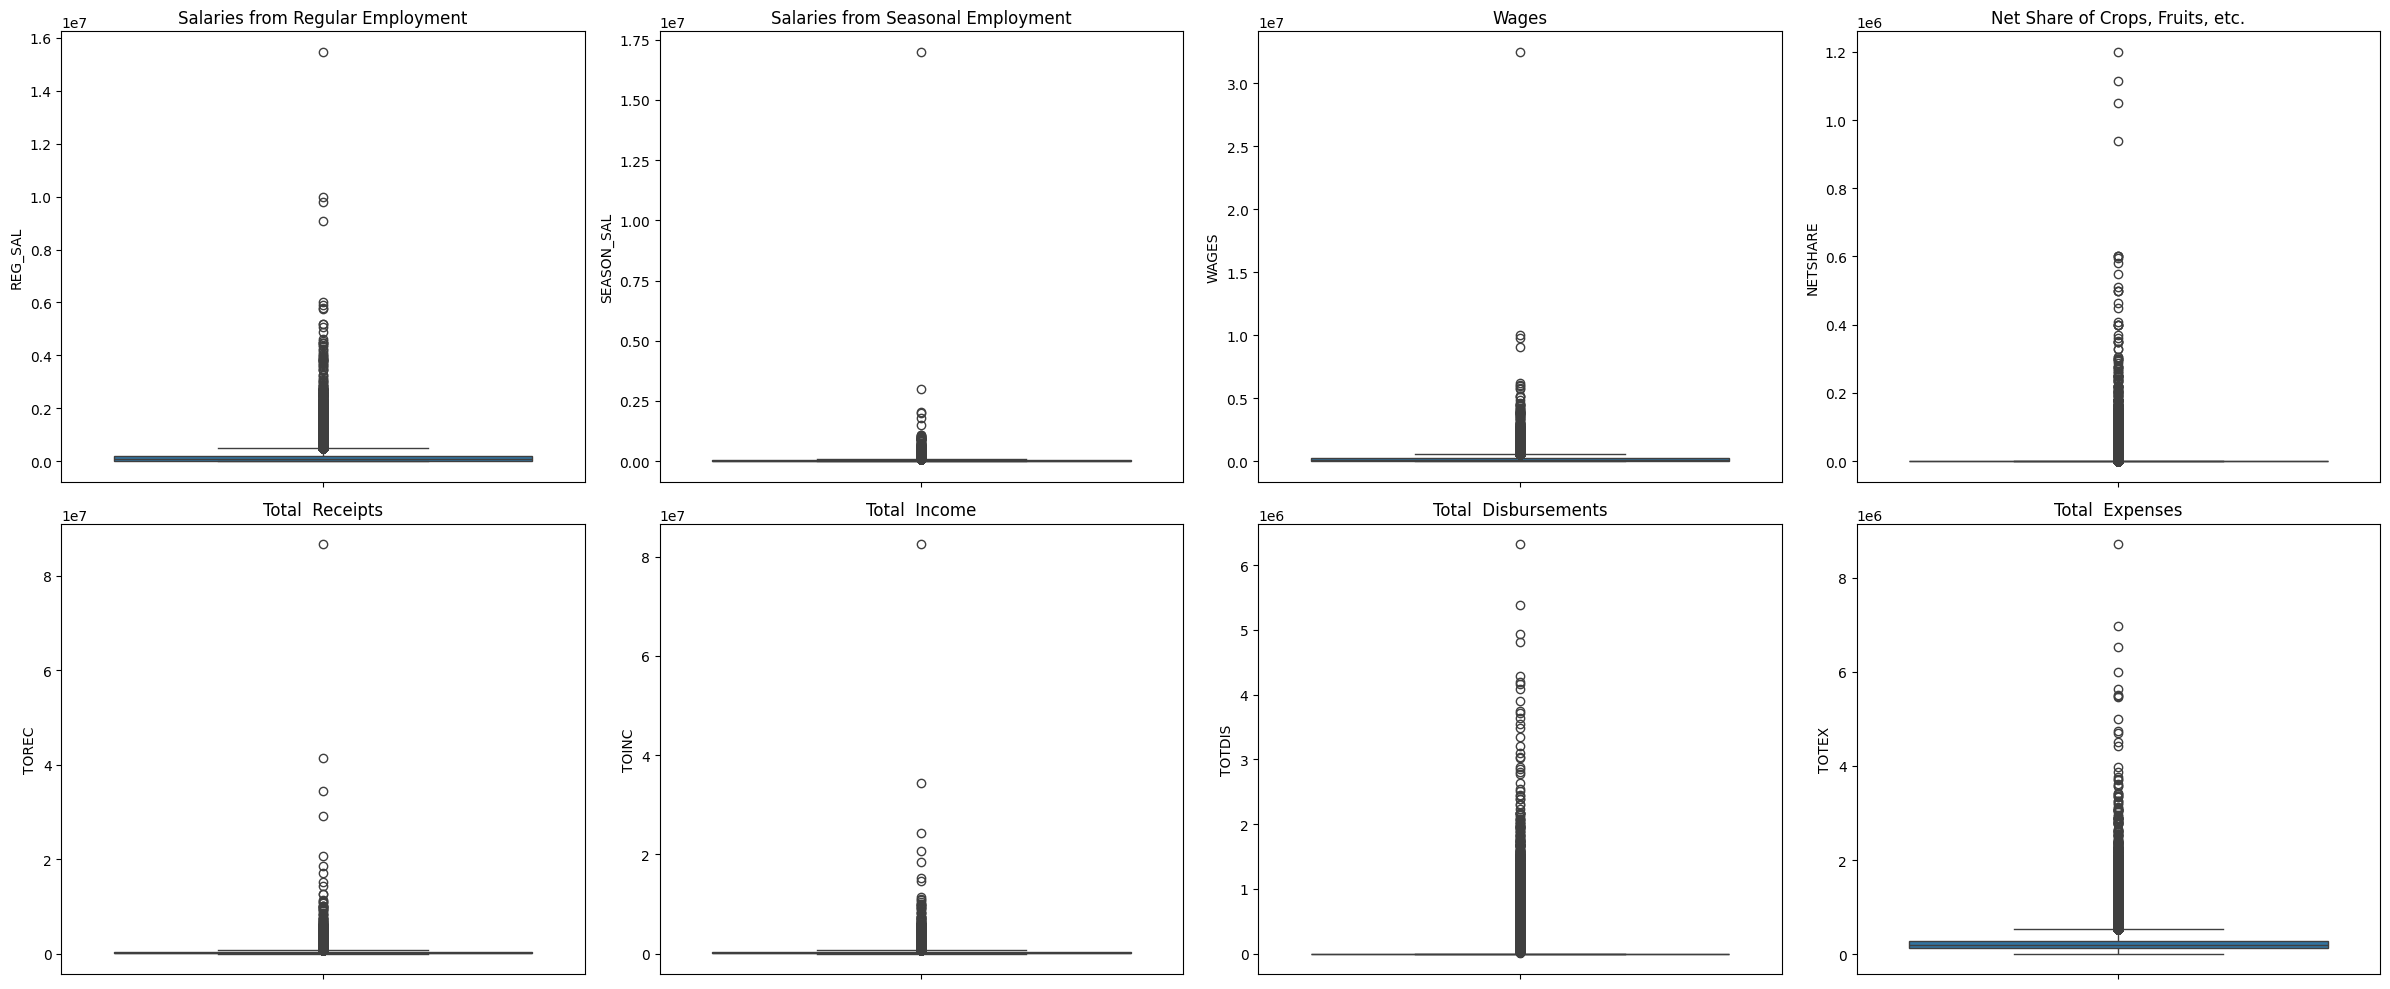

In [214]:
fig, axes = plt.subplots(2,4, figsize=(24,10))

sns.boxplot(df_23["REG_SAL"], ax=axes[0,0])
axes[0,0].set_title('Salaries from Regular Employment')

sns.boxplot(df_23["SEASON_SAL"], ax=axes[0,1])
axes[0,1].set_title('Salaries from Seasonal Employment')

sns.boxplot(df_23["WAGES"], ax=axes[0,2])
axes[0,2].set_title('Wages')

sns.boxplot(df_23["NETSHARE"], ax=axes[0,3])
axes[0,3].set_title('Net Share of Crops, Fruits, etc.')

sns.boxplot(df_23["TOREC"], ax=axes[1,0])
axes[1,0].set_title('Total  Receipts')

sns.boxplot(df_23["TOINC"], ax=axes[1,1])
axes[1,1].set_title('Total  Income')

sns.boxplot(df_23["TOTDIS"], ax=axes[1,2])
axes[1,2].set_title('Total  Disbursements')

sns.boxplot(df_23["TOTEX"], ax=axes[1,3])
axes[1,3].set_title('Total  Expenses')

plt.tight_layout()
plt.show()

## Preliminary Visualization

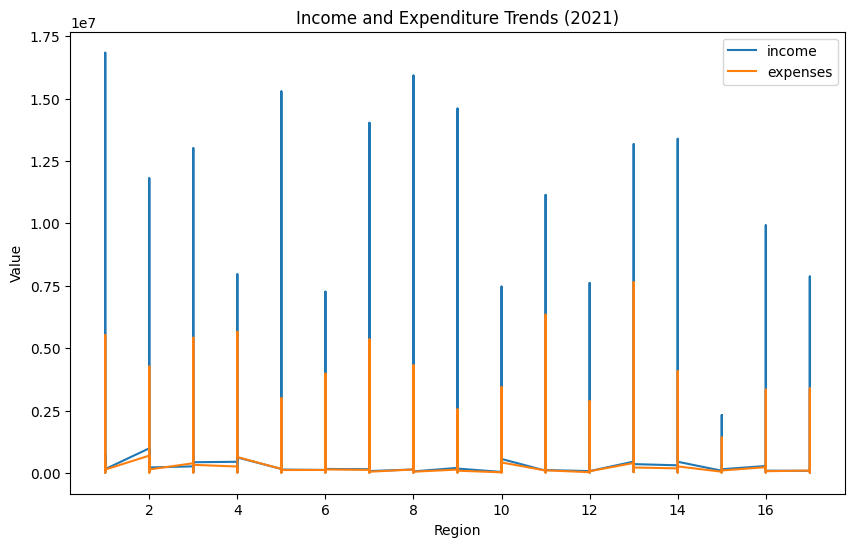

In [215]:
plt.figure(figsize=(10,6))
plt.plot(df_21['W_REGN'], df_21['TOINC'], label="income")
plt.plot(df_21['W_REGN'], df_21['TOTEX'], label="expenses")
plt.title('Income and Expenditure Trends (2021)')
plt.xlabel('Region')
plt.ylabel('Value')
plt.legend()
plt.show()

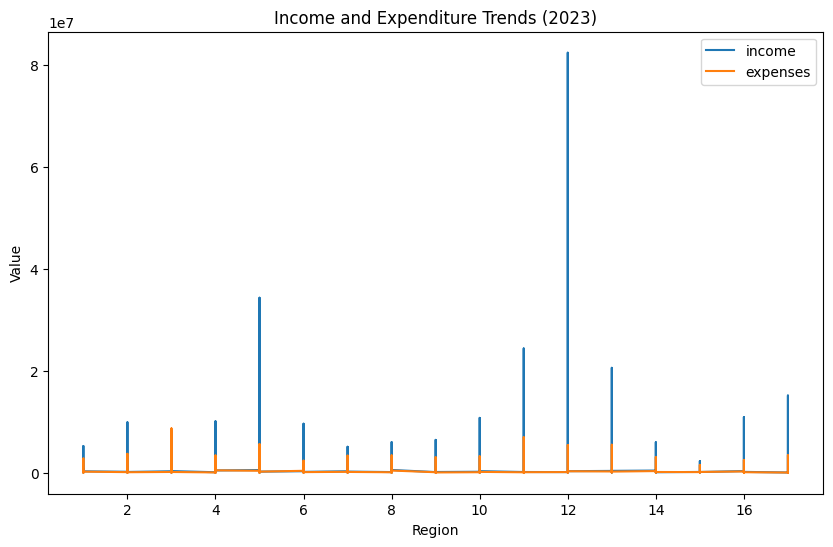

In [216]:
plt.figure(figsize=(10,6))
plt.plot(df_23['W_REGN'], df_23['TOINC'], label="income")
plt.plot(df_23['W_REGN'], df_23['TOTEX'], label="expenses")
plt.title('Income and Expenditure Trends (2023)')
plt.xlabel('Region')
plt.ylabel('Value')
plt.legend()
plt.show()

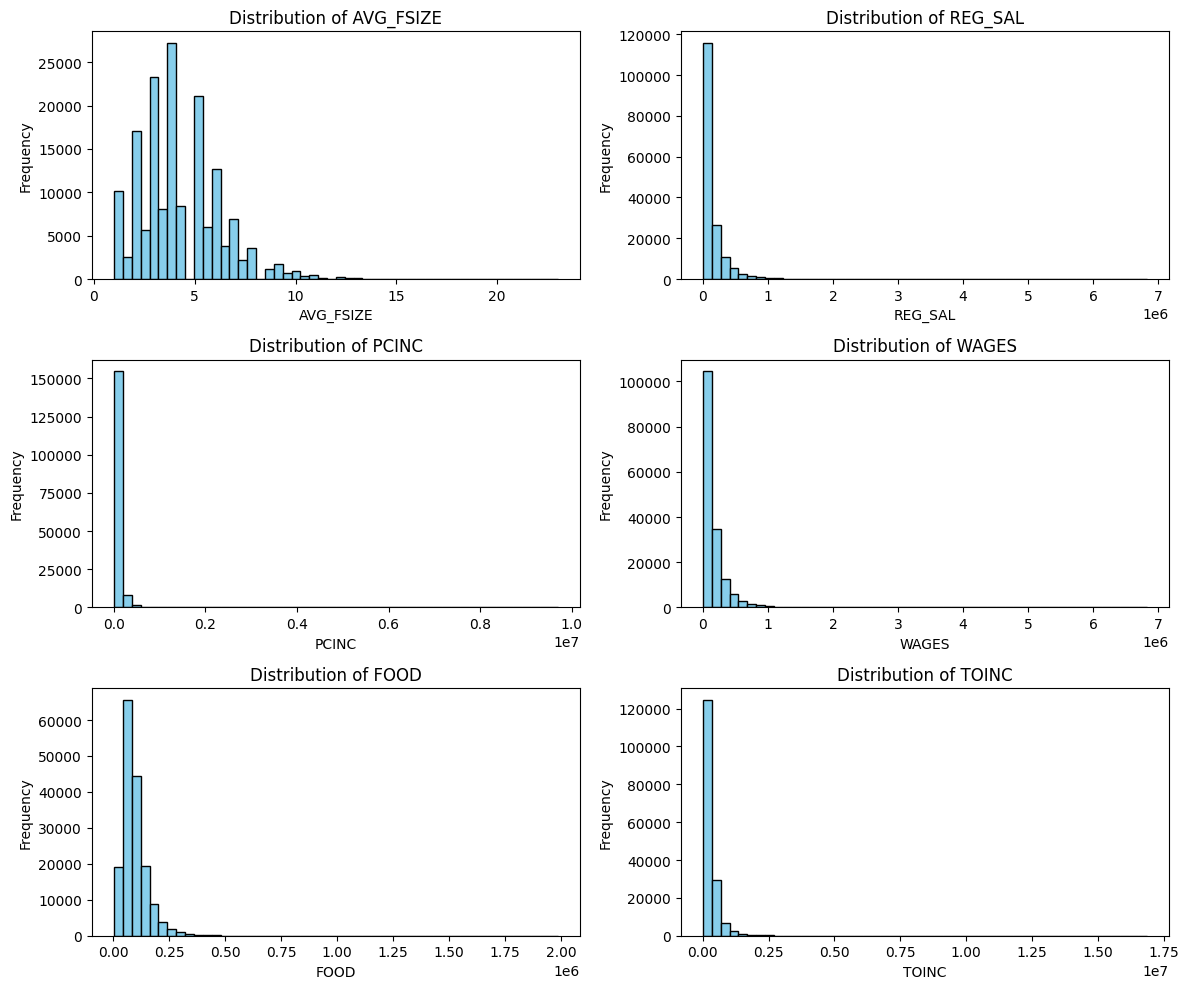

In [237]:
columns_to_plot = ['AVG_FSIZE', 'REG_SAL', 'PCINC', 'WAGES', 'FOOD', 'TOINC']

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for i, col in enumerate(columns_to_plot):
    ax = axes[i//2, i%2]
    ax.hist(df_21[col], bins=50, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Preliminary Findings (Summary Statistics)

### Statistics about the `FSIZE` (Family Size)

In [219]:
# Statistics about `FSIZE`
df_21['AVG_FSIZE'].describe()

count   165029.00
mean         4.24
std          2.03
min          1.00
25%          3.00
50%          4.00
75%          5.50
max         23.00
Name: AVG_FSIZE, dtype: float64

### Statistics about the `REG_SAL` (Regular Salary)

In [220]:
# Statistics about `REG_SAL`

df_21['REG_SAL'].describe()

count    165029.00
mean     125300.56
std      205360.38
min           0.00
25%           0.00
50%       56000.00
75%      165400.00
max     6821000.00
Name: REG_SAL, dtype: float64

### Statistics about `PCINC` (Per Capita Income)

In [221]:
# Statistics about `PCINC`
df_21['PCINC'].describe()

count    165029.00
mean      81850.92
std      101006.56
min        5408.62
25%       35403.00
50%       55432.00
75%       94000.00
max     9691285.00
Name: PCINC, dtype: float64